In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/Datasets/HAM10000_metadata.csv"
df = pd.read_csv(path)
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df.rename(columns={"Diagnosis":"diagnosis"}, inplace = True)
df.head(5)

,lesion_id,image_id,diagnosis,Diagnosis_Type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.head(2)

,lesion_id,image_id,Diagnosis,Diagnosis_Type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp


In [ ]:
df["sex"].astype("category")

0          male
1          male
2          male
3          male
4          male
          ...  
10010      male
10011      male
10012      male
10013      male
10014    female
Name: sex, Length: 10015, dtype: category
Categories (3, object): ['female', 'male', 'unknown']

In [ ]:
df["age"].isnull().any()

True

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

In [ ]:
df["Diagnosis"].isnull().any()
df["Diagnosis_Type"].isnull().any()

False

In [ ]:
df["sex"].isnull().isnull().any()

False

In [ ]:
df["age"].isnull().any()

False

In [ ]:
df["lesion_id"].isnull().any()
df["image_id"].isnull().any()

False

In [ ]:
df.rename(columns={"Diagnosis_Type":"diagnosis_Type"}, inplace = True)
df.head(5)

,lesion_id,image_id,diagnosis,diagnosis_Type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.head(10)

,lesion_id,image_id,diagnosis,diagnosis_Type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
age_diagnosis_counts = df.groupby(['age', 'diagnosis']).size().reset_index(name='count')

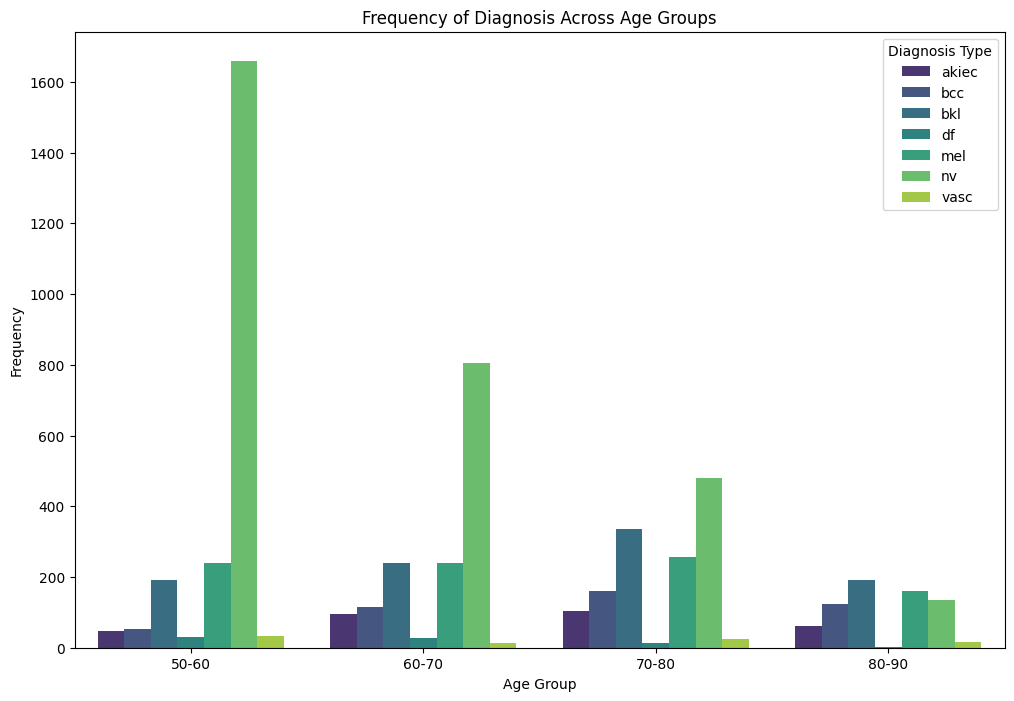

In [69]:
bins = [50, 60, 70, 80, 90]
labels = ['50-60', '60-70', '70-80', '80-90']

df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_diagnosis_counts = df.groupby(['age_bin', 'diagnosis']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='age_bin', y='count', hue='diagnosis', data=age_diagnosis_counts, palette='viridis')

plt.title('Frequency of Diagnosis Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Diagnosis Type')
plt.show()

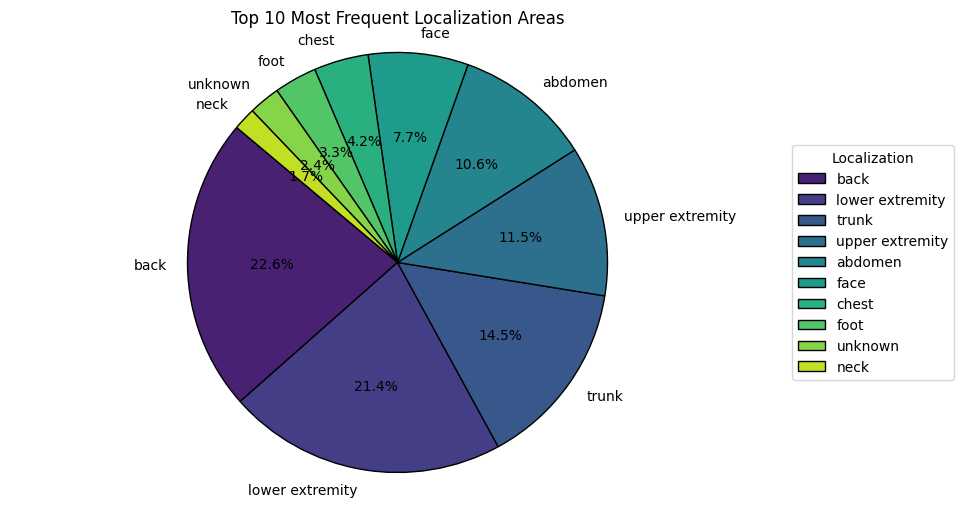

In [72]:
# Aggregate the data by localization and select top 10
localization_counts = df['localization'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(10, 6))

plt.legend(localization_counts.index, title="Localization", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Top 10 Most Frequent Localization Areas')
plt.axis('equal')
plt.show()

<ipython-input-73-1af7082a3e23>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')


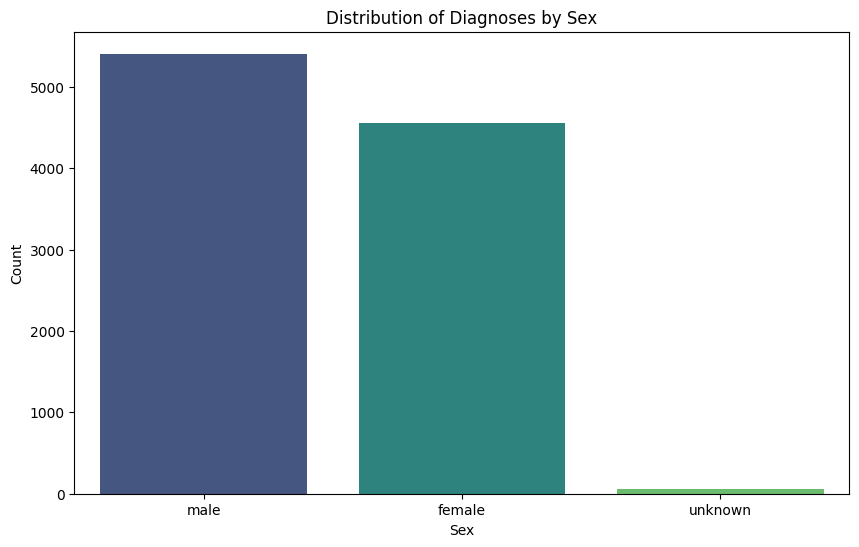

In [73]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')

plt.title('Distribution of Diagnoses by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-75-327c4e207042>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_type_counts.index, y=diagnosis_type_counts.values, palette='viridis')


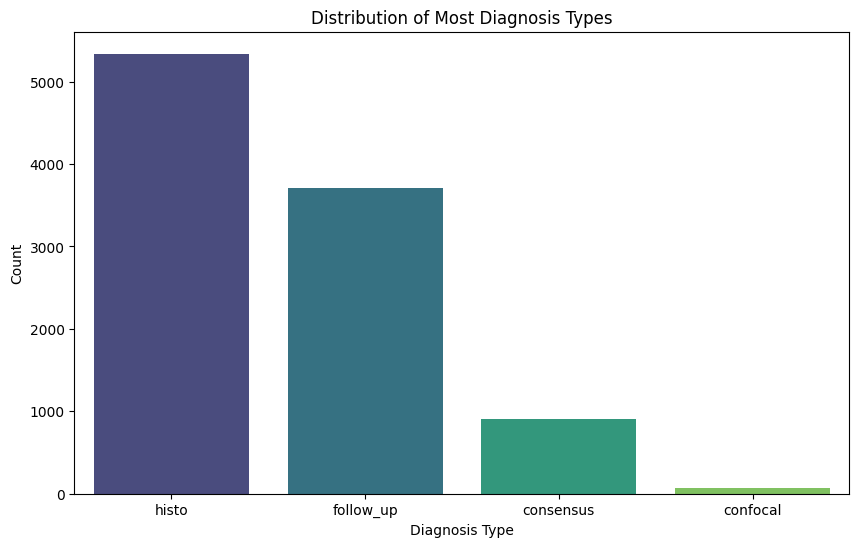

In [75]:
diagnosis_type_counts = df['diagnosis_Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_type_counts.index, y=diagnosis_type_counts.values, palette='viridis')

plt.title('Distribution of Most Diagnosis Types')
plt.xlabel('Diagnosis Type')
plt.ylabel('Count')
plt.show()